In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from random import random, seed
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import functions as fn
import os
from sklearn import linear_model
import seaborn as sns


# Franke Function

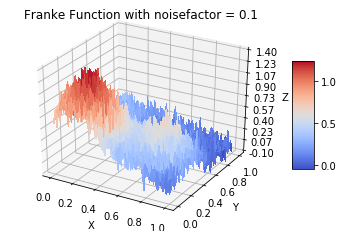

In [2]:
# Make data.
N = 70
noisefactor = 0.1
x,y,z = fn.init_data(N,noisefactor)

# Plot the surface.
fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,
linewidth=0, antialiased=False)
# Customize the z axis.
ax.set_zlim((-0.10, 1.40))
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title("Franke Function with noisefactor = {}".format(noisefactor))
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()


# OLS

The MSE for the prediciton is:
0.012858795072731669 

The R2 for the prediciton is:
0.85477008464907 



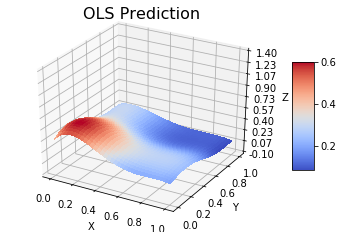

In [3]:
# Initializing the data
N = 70
noisefactor = 0.1
n = 5
test_size=0.2

# Intializing the dataset
x, y, z = fn.init_data(N,noisefactor)

# Creating the design matrix
X = fn.create_X(x, y, n)

# Splitting into testing and training
X_train, X_test, z_train, z_test = train_test_split(X, z.ravel(), test_size=test_size)

#Scaling the data
X_train, X_test = fn.Scaling(X_train, X_test)

# Inverting XTX matrix with SVD to avoid singular matrix
XTXinv = fn.SVDinv(X_train.T.dot(X_train))

# Estimating the Ordinary Least Squares Beta Matrix
OLSbeta = XTXinv.dot(X_train.T).dot(z_train)

# Making the prediciton
z_tilde = X_train @ OLSbeta
z_predict = X_test @ OLSbeta

#Computing variance
betavar_OLS = np.sqrt(np.diag(XTXinv)*np.var(z_train))


# Printing Scores
print("The MSE for the prediciton is:")
print(fn.MSE(z_test, z_predict), "\n")

print("The R2 for the prediciton is:")
print(fn.R2(z_test, z_predict), "\n")
fn.surfplotter(x,y,OLSbeta, n, 'OLS Prediction',(-0.10, 1.40))

# RIDGE

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in sqrt


The MSE for the prediciton is:
0.011973225704388283 

The R2 for the prediciton is:
0.8710705403697631 



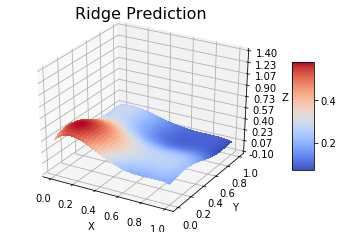

In [4]:
# Initializing the data parameters
N = 70
noisefactor = 0.1
n = 5
test_size=0.2

# Penalty Term
lamb = 1e-3

# Intializing the dataset
x, y, z = fn.init_data(N,noisefactor)

# Creating the design matrix
X = fn.create_X(x, y, n)

# Splitting into testing and training
X_train, X_test, z_train, z_test = train_test_split(X, z.ravel(), test_size=test_size)

#Scaling the data
X_train, X_test = fn.Scaling(X_train, X_test)

# Inverting XTX matrix with SVD to avoid singular matrix
XTXinv = fn.SVDinv(X_train.T.dot(X_train)+lamb*np.eye(len(X_train[0])))

# Estimating the Ordinary Least Squares Beta Matrix
RIDGEbeta = XTXinv.dot(X_train.T).dot(z_train) 



# Making the prediciton
z_tilde = X_train @ RIDGEbeta
z_predict = X_test @ RIDGEbeta

# Computing variance
betavar_RIDGE = np.diag(np.sqrt(np.var(z_train)*(XTXinv) @ X_train.T.dot(X_train) @ (XTXinv.T)))

# Printing Scores
print("The MSE for the prediciton is:")
print(fn.MSE(z_test, z_predict), "\n")

print("The R2 for the prediciton is:")
print(fn.R2(z_test, z_predict), "\n")

fn.surfplotter(x,y,RIDGEbeta,n, 'Ridge Prediction',(-0.10, 1.40))


# LASSO

The MSE for the prediciton is:
0.02067445465977768 

The R2 for the prediciton is:
0.7695699924131283 



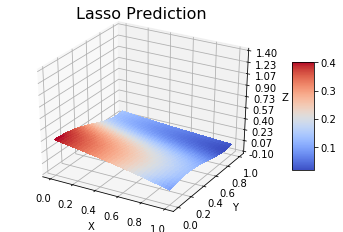

In [5]:
# Initializing the data parameters
N = 70
noisefactor = 0.1
test_size = 0.2
n = 5
lamb = 1e-3


# Intializing the dataset
x, y, z = fn.init_data(N, noisefactor)

# Creating the design matrix
X = fn.create_X(x, y, n)

# Splitting into testing and training
X_train, X_test, z_train, z_test = train_test_split(X, z.ravel(), test_size=test_size)

#Scaling the data
X_train, X_test = fn.Scaling(X_train, X_test)

clf = linear_model.Lasso(alpha=lamb, fit_intercept=False, max_iter=100000, tol=0.01)
clf.fit(X_train, z_train)
LASSObeta = clf.coef_


# Making the prediciton
z_tilde = X_train @ LASSObeta
z_predict = X_test @ LASSObeta


# Printing Scores
print("The MSE for the prediciton is:")
print(fn.MSE(z_test, z_predict), "\n")

print("The R2 for the prediciton is:")
print(fn.R2(z_test, z_predict), "\n")
fn.surfplotter(x,y,LASSObeta,n, 'Lasso Prediction',(-0.10, 1.40))


# COMPARING OLS AND RIDGE CONFIDENCE INTERVALS

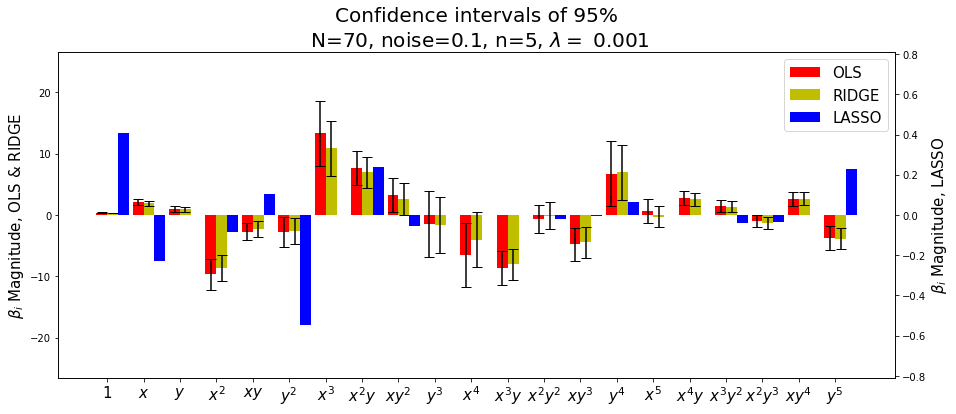

In [6]:
# Plotting the figure


labels= ['1','$x$','$y$','$x^2$','$xy$','$y^2$','$x^3$','$x^2y$','$xy^2$','$y^3$','$x^4$',
         '$x^3y$','$x^2y^2$','$xy^3$','$y^4$','$x^5$','$x^4y$','$x^3y^2$','$x^2y^3$','$xy^4$','$y^5$']

ind = np.arange(len(RIDGEbeta))
width = 0.3

fig, ax = plt.subplots(figsize=(15,6))
rects1 = ax.bar(ind, OLSbeta, width, color = 'r', yerr=2*betavar_OLS, capsize=5)
rects2 = ax.bar(ind+width, RIDGEbeta, width, color = 'y', yerr=2*betavar_RIDGE, capsize=5)
ax2 = ax.twinx()
rects3 = ax2.bar(ind+2*width, LASSObeta, width, color='b')



ax.set_ylabel(r"$\beta_i$ Magnitude, OLS & RIDGE", fontsize=15)
ax2.set_ylabel(r"$\beta_i$ Magnitude, LASSO", fontsize=15)

ax.set_ylim(-2*np.max(OLSbeta),2*np.max(OLSbeta))
ax2.set_ylim(-2*np.max(LASSObeta),2*np.max(LASSObeta))
ax.set_xticks(ind+width/2)
ax.set_xticklabels(labels, fontsize=15)
ax.set_title('Confidence intervals of 95%\n N={}, noise={}, n={}, $\lambda =$ {}'.format(N, noisefactor,n,lamb), fontsize=20)
ax.legend((rects1[0],rects2[0], rects3[0]), ('OLS', 'RIDGE', 'LASSO'), fontsize=15)
plt.show()

#fig.savefig('Results/betaconfidenceRIDGE.png')



# Train and Test error with Increasing Complexity
## Making a figure similar to that in Hasties et al

In [112]:
# Initializing the data parameters
N = 70
noisefactor = 0.1
test_size = 0.2
n =  15
iterations = 100

# Initializing the data
x, y, z = fn.init_data(N, noisefactor)

# Creating arrays for train and test error
TrainError = np.zeros(n)
TestError = np.zeros(n)

# Calculating Test and Training error over many iterations to get the expected value of train and test error.
for k in range(iterations):
    for i in range(n):
        # Creating design matrix, splitting and scaling
        X_train, X_test, z_train, z_test = fn.PreProcess(x, y, z, test_size, i)

        # Estimating the Ordinary Least Squares Beta Matrix
        # Inverting XTX matrix with SVD to avoid singular matrix
        OLSbeta = fn.SVDinv(X_train.T.dot(X_train)).dot(X_train.T).dot(z_train)

        # Making the prediciton
        z_tilde = X_train @ OLSbeta
        z_predict = X_test @ OLSbeta
        
        # Computing the mean errors
        TrainError[i] += fn.MSE(z_train, z_tilde)/iterations
        TestError[i] += fn.MSE(z_test, z_predict)/iterations
    


C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


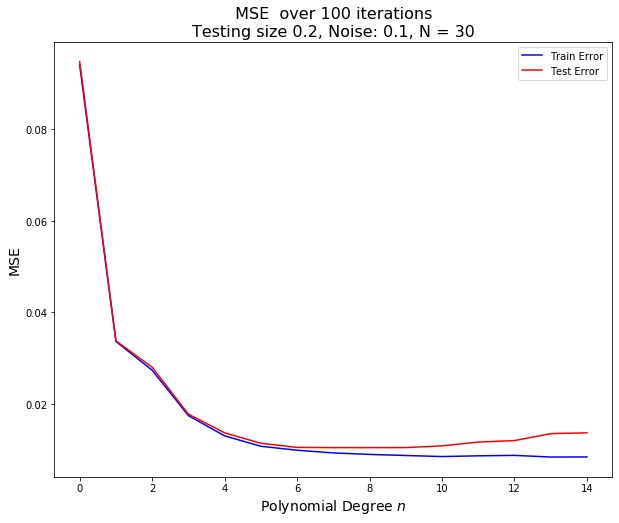

In [113]:
startpoint = 0
endpoint = 20
fig, ax = plt.subplots(figsize=(10,8))

ax.plot(np.arange(n)[startpoint:endpoint],TrainError[startpoint:endpoint],'b' ,label='Train Error')
ax.plot(np.arange(n)[startpoint:endpoint],TestError[startpoint:endpoint],'r' ,label='Test Error')
ax.set_xlabel('Polynomial Degree $n$', fontsize=14)
ax.set_ylabel('MSE',fontsize=14)
ax.set_title(" MSE  over {0} iterations \nTesting size {1}, Noise: {2}, N = {3}".format(iterations, test_size, noisefactor, N), fontsize=16)


ax.legend()
#fig.savefig('Results/MSEiterations.png')
fig.show()

# OLS Bootstrapping Train Test Error

In [114]:
# Data Parameters
N = 30
noisefactor = 0.1
test_size = 0.2
n = 15

# Initializing the data
x, y, z = fn.init_data(N, noisefactor)
z=z.ravel()


# Intializing error bias and variance
error = np.zeros(n)
bias = np.zeros(n)
variance = np.zeros(n)

# Bootstrap parameters
n_bootstraps = 100

for i in range(n):
    # Creating design matrix, splitting and scaling
    X_train, X_test, z_train, z_test = fn.PreProcess(x, y, z, test_size, i)

    # Setting up the array for the bootstrapped predictions
    z_pred = np.empty((z_test.shape[0], n_bootstraps))
    
    for j in range(n_bootstraps):
        x_, z_  = fn.Shuffle_Data(X_train, z_train)
        OLSbeta = fn.SVDinv(x_.T.dot(x_)).dot(x_.T).dot(z_) 
        z_pred[:,j] = X_test @ OLSbeta 

    #Reshaping
    z_test = z_test.reshape(len(z_test),1)
    
    error[i], bias[i], variance[i] = fn.ErrBiasVar(z_test, z_pred)

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


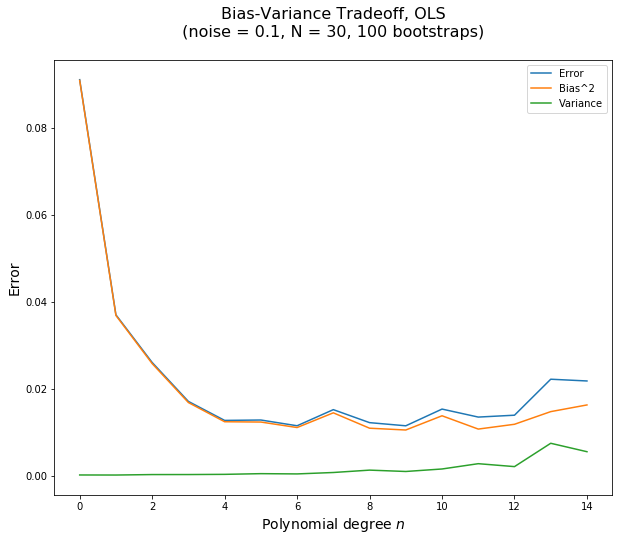

In [115]:
startpoint = 0
endpoint = 15

fig, ax = plt.subplots(figsize=(10,8))

ax.plot(np.arange(n)[startpoint:endpoint], error[startpoint:endpoint], label='Error')
ax.plot(np.arange(n)[startpoint:endpoint], bias[startpoint:endpoint], label='Bias^2')
ax.plot(np.arange(n)[startpoint:endpoint], variance[startpoint:endpoint], label='Variance')



ax.set_ylabel("Error", fontsize=14)
ax.set_xlabel("Polynomial degree $n$",  fontsize=14)
ax.set_title("Bias-Variance Tradeoff, OLS\n (noise = {0}, N = {1}, {2} bootstraps) \n".format(noisefactor, N, n_bootstraps), fontsize =16)


#ax.set_yscale("log")
ax.legend()
plt.savefig("Results/BootstrapOLSBiasVariance.png", dpi=100)
fig.show()


# Ridge k fold cross validation

## NOTE:
### The k-fold cross validation resampling technique was not giving proper results for the error and the bias.
### The variance acted nicely,  with high variance at high $n$ and low $\lambda$. The bias and the error gave seemed to yield a "white noise" in the heatmaps.

In [11]:
# Data Parameters
N = 70
noisefactor = 0.1
test_size = 0.2
n = 15

# Initializing the data
x, y, z = fn.init_data(N, noisefactor)
z = z.ravel()

# penalty term
lamb = np.logspace(-5,2,8)

# CV fold parameters 
folds = 10


# Intializing error bias and variance
error_val = np.zeros((len(lamb),n))
bias_val = np.zeros((len(lamb),n))
variance_val = np.zeros((len(lamb),n))


for k in range(len(lamb)):
    print("Lamdba equals {}".format(lamb[k]))
    for i in range(n):
        # Creating design matrix
        X = fn.create_X(x,y,i)
        
        # Shuffle the data
        ind = np.random.permutation(len(X))
        X = X[ind,:]
        z = z[ind]
        
        # Test Train splitting of data
        X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.2)

        #Split data into k folds
        folds_X = np.array_split(X_train,folds)
        folds_z = np.array_split(z_train,folds)
      

        # Setting up the array for the k fold predictions
        foldsize = np.int(len(X_train)/folds)  

       
        error_val_cur = np.empty((len(folds_X)))
        bias_val_cur  = np.empty((len(folds_X)))
        var_val_cur   = np.empty((len(folds_X)))
 
        for j in range(len(folds_X)):
                # Copy data frames
                tmp_X = folds_X.copy()
                tmp_z = folds_z.copy()
                
                # Save target fold from data frame
                cur_leaveout_X = tmp_X[j]
                cur_leaveout_z = tmp_z[j]
                
                # Remove leaveouts 
                tmp_X.pop(j)
                tmp_z.pop(j)
                
                cur_X_trainfold = np.concatenate(tmp_X)
                cur_z_trainfold = np.concatenate(tmp_z)
                
                # Fitting Ridge to the fold
                RIDGEbeta = fn.SVDinv(cur_X_trainfold.T.dot(cur_X_trainfold)+lamb[k]*np.eye(len(cur_X_trainfold[0]))).dot(cur_X_trainfold.T).dot(cur_z_trainfold) 
                
                z_val = cur_leaveout_X @ RIDGEbeta
                z_tilde = cur_X_trainfold @ RIDGEbeta
                z_pred = X_test @ RIDGEbeta

                # Computing the error
                error_val_cur[j] = fn.MSE(z_test,z_pred) #np.mean((z_test-z_pred)**2)
                bias_val_cur[j]  = np.mean((z_test - np.mean(z_pred))**2)
                var_val_cur[j]   = np.var(z_pred)
                
        #fn.surfplotter(x,y,RIDGEbeta,i, 'Ridge Prediction',(-0.10, 1.40))

        error_val[k,i] = np.mean(error_val_cur)
        bias_val[k,i]  = np.mean(bias_val_cur)
        variance_val[k,i] = np.mean(var_val_cur)

        

Lamdba equals 1e-05
Lamdba equals 0.0001
Lamdba equals 0.001
Lamdba equals 0.01
Lamdba equals 0.1
Lamdba equals 1.0
Lamdba equals 10.0
Lamdba equals 100.0


Text(0.5, 15.0, '$\\lambda$')

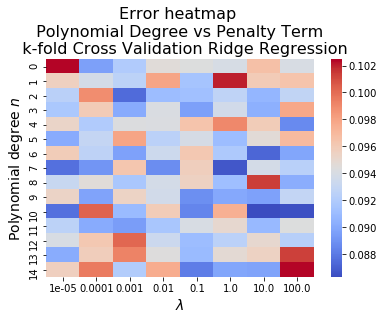

In [12]:
ax = sns.heatmap(error_val.T, xticklabels=lamb, cmap="coolwarm")
ax.set_title('Error heatmap \n Polynomial Degree vs Penalty Term \n  k-fold Cross Validation Ridge Regression',fontsize = 16)
ax.set_ylabel('Polynomial degree $n$',fontsize = 14)
ax.set_xlabel('$\lambda$',fontsize = 14)

Text(0.5, 15.0, '$\\lambda$')

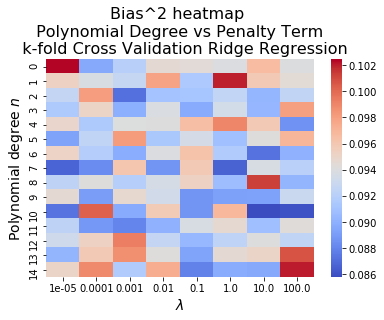

In [13]:
ax = sns.heatmap(bias_val.T, xticklabels=lamb, cmap="coolwarm")
ax.set_title('Bias^2 heatmap \n Polynomial Degree vs Penalty Term \n  k-fold Cross Validation Ridge Regression',fontsize = 16)
ax.set_ylabel('Polynomial degree $n$',fontsize = 14)
ax.set_xlabel('$\lambda$',fontsize = 14)

Text(0.5, 15.0, '$\\lambda$')

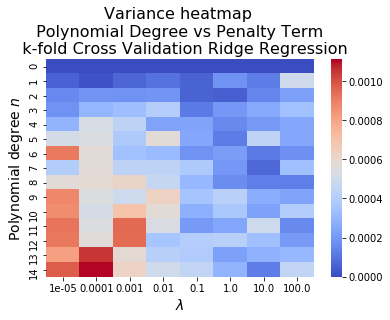

In [14]:
ax = sns.heatmap(variance_val.T, xticklabels=lamb, cmap="coolwarm")
ax.set_title('Variance heatmap \n Polynomial Degree vs Penalty Term \n  k-fold Cross Validation Ridge Regression',fontsize = 16)
ax.set_ylabel('Polynomial degree $n$',fontsize = 14)
ax.set_xlabel('$\lambda$',fontsize = 14)

# RIDGE BOOTSTRAPPING

In [87]:
# Data Parameters
N = 70
noisefactor = 0.1
test_size = 0.2
n = 15

# Initializing the data
x, y, z = fn.init_data(N, noisefactor)


# Lambda
lamb = np.logspace(-5,2,8)

# Bootstrap parameters
n_bootstraps = 50


# Intializing error bias and variance
error = np.zeros((len(lamb),n))
bias = np.zeros((len(lamb),n))
variance = np.zeros((len(lamb),n))
activridge = np.zeros((len(lamb),n))

for k in range(len(lamb)):
    print("Lamdba equals {}".format(lamb[k]))
    for i in range(n):
            
        # Creating design matrix, splitting and scaling
        X_train, X_test, z_train, z_test = fn.PreProcess(x, y, z, test_size, i)

        # Setting up the array for the bootstrapped predictions
        z_pred = np.empty((z_test.shape[0], n_bootstraps))

        for j in range(n_bootstraps):
            x_, z_  = fn.Shuffle_Data(X_train, z_train)
            RIDGEbeta = fn.SVDinv(x_.T.dot(x_)+lamb[k]*np.eye(len(X_train[0]))).dot(x_.T).dot(z_) 

            z_pred[:,j] = X_test @ RIDGEbeta 

        #Reshaping
        z_test = z_test.reshape(len(z_test),1)


        error[k,i], bias[k,i], variance[k,i] = fn.ErrBiasVar(z_test, z_pred)

        activridge[k,i] = np.sum(RIDGEbeta<=0.001)

Lamdba equals 1e-05
Lamdba equals 0.0001
Lamdba equals 0.001
Lamdba equals 0.01
Lamdba equals 0.1
Lamdba equals 1.0
Lamdba equals 10.0
Lamdba equals 100.0


Text(0.5, 15.0, '$\\lambda$')

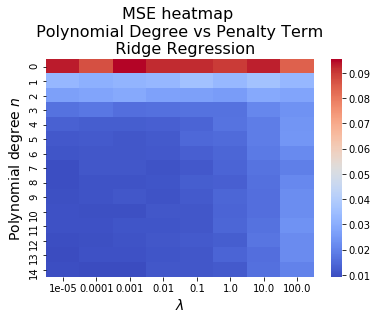

In [88]:
ax = sns.heatmap(error.T, xticklabels=lamb, cmap="coolwarm")
ax.set_title('MSE heatmap \n Polynomial Degree vs Penalty Term \n  Ridge Regression',fontsize = 16)
ax.set_ylabel('Polynomial degree $n$',fontsize = 14)
ax.set_xlabel('$\lambda$',fontsize = 14)

Text(0.5, 15.0, '$\\lambda$')

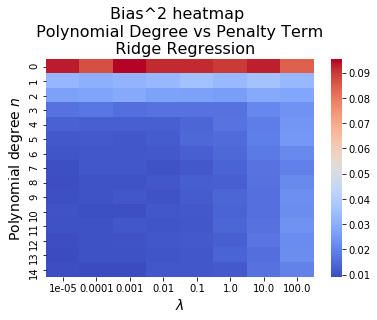

In [89]:
ax = sns.heatmap(bias.T, xticklabels=lamb, cmap="coolwarm")
ax.set_title('Bias^2 heatmap \n Polynomial Degree vs Penalty Term \n  Ridge Regression',fontsize = 16)
ax.set_ylabel('Polynomial degree $n$',fontsize = 14)
ax.set_xlabel('$\lambda$',fontsize = 14)

Text(0.5, 15.0, '$\\lambda$')

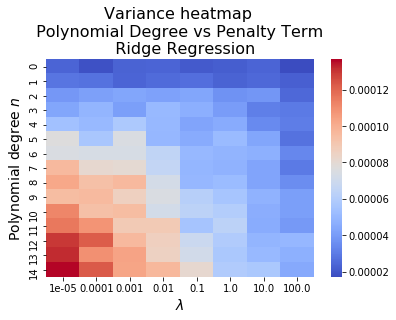

In [90]:
ax = sns.heatmap(variance.T, xticklabels=lamb, cmap="coolwarm")
ax.set_title('Variance heatmap \n Polynomial Degree vs Penalty Term \n  Ridge Regression',fontsize = 16)
ax.set_ylabel('Polynomial degree $n$',fontsize = 14)
ax.set_xlabel('$\lambda$',fontsize = 14)

Text(0.5, 15.0, '$\\lambda$')

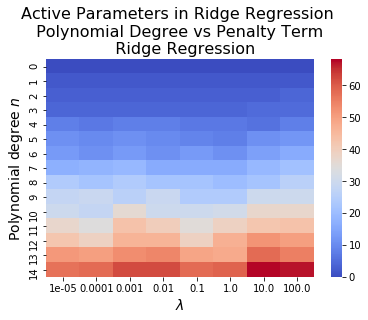

In [91]:
ax = sns.heatmap(activridge.T, xticklabels=lamb, cmap="coolwarm")
ax.set_title('Active Parameters in Ridge Regression \n Polynomial Degree vs Penalty Term \n  Ridge Regression',fontsize = 16)
ax.set_ylabel('Polynomial degree $n$',fontsize = 14)
ax.set_xlabel('$\lambda$',fontsize = 14)

# LASSO BOOTSTRAPPING

In [92]:
from sklearn import linear_model
# Data Parameters
N = 70
noisefactor = 0.1
test_size = 0.2
n = 15

# Initializing the data
x, y, z = fn.init_data(N, noisefactor)

# Lambda
lamb = np.logspace(-5,2,8)
# Bootstrap parameters
n_bootstraps = 50

# Intializing error bias and variance
error = np.zeros((len(lamb),n))
bias = np.zeros((len(lamb),n))
variance = np.zeros((len(lamb),n))
activlasso = np.zeros((len(lamb),n))

for k in range(len(lamb)):
    print("Lamdba equals {}".format(lamb[k]))

    for i in range(n):
        print("n equals {}".format(i))
        # Creating design matrix, splitting and scaling
        X_train, X_test, z_train, z_test = fn.PreProcess(x, y, z, test_size, i)

        # Setting up the array for the bootstrapped predictions
        z_pred = np.empty((z_test.shape[0], n_bootstraps))

        for j in range(n_bootstraps):
            x_, z_  = fn.Shuffle_Data(X_train, z_train)

            # Lasso regression
            clf = linear_model.Lasso(alpha=lamb[k], fit_intercept=False)
            clf.fit(x_, z_)
            LASSObeta = clf.coef_
            z_pred[:,j] = X_test @ LASSObeta 
            
        
        
        
        
        #Reshaping
        z_test = z_test.reshape(len(z_test),1)


        error[k,i], bias[k,i], variance[k,i] = fn.ErrBiasVar(z_test, z_pred)
        activlasso[k,i] = np.sum(RIDGEbeta<=0.001)

Lamdba equals 1e-05
n equals 0
n equals 1
n equals 2
n equals 3
n equals 4
n equals 5
n equals 6
n equals 7
n equals 8
n equals 9
n equals 10
n equals 11
n equals 12
n equals 13
n equals 14
Lamdba equals 0.0001
n equals 0
n equals 1
n equals 2
n equals 3
n equals 4
n equals 5
n equals 6
n equals 7
n equals 8
n equals 9
n equals 10
n equals 11
n equals 12
n equals 13
n equals 14
Lamdba equals 0.001
n equals 0
n equals 1
n equals 2
n equals 3
n equals 4
n equals 5
n equals 6
n equals 7
n equals 8
n equals 9
n equals 10
n equals 11
n equals 12
n equals 13
n equals 14
Lamdba equals 0.01
n equals 0
n equals 1
n equals 2
n equals 3
n equals 4
n equals 5
n equals 6
n equals 7
n equals 8
n equals 9
n equals 10
n equals 11
n equals 12
n equals 13
n equals 14
Lamdba equals 0.1
n equals 0
n equals 1
n equals 2
n equals 3
n equals 4
n equals 5
n equals 6
n equals 7
n equals 8
n equals 9
n equals 10
n equals 11
n equals 12
n equals 13
n equals 14
Lamdba equals 1.0
n equals 0
n equals 1
n equals 2
n

Text(0.5, 15.0, '$\\lambda$')

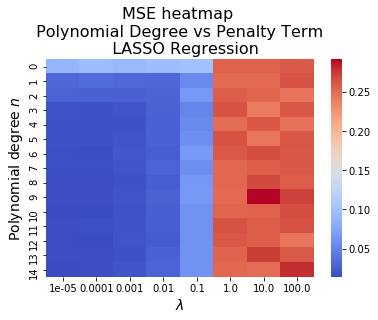

In [93]:
ax = sns.heatmap(error.T, xticklabels=lamb, cmap="coolwarm")
ax.set_title('MSE heatmap \n Polynomial Degree vs Penalty Term \n  LASSO Regression',fontsize = 16)
ax.set_ylabel('Polynomial degree $n$',fontsize = 14)
ax.set_xlabel('$\lambda$',fontsize = 14)

Text(0.5, 15.0, '$\\lambda$')

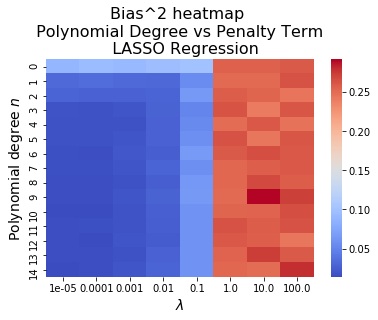

In [94]:
ax = sns.heatmap(bias.T, xticklabels=lamb, cmap="coolwarm")
ax.set_title('Bias^2 heatmap \n Polynomial Degree vs Penalty Term \n  LASSO Regression',fontsize = 16)
ax.set_ylabel('Polynomial degree $n$',fontsize = 14)
ax.set_xlabel('$\lambda$',fontsize = 14)

Text(0.5, 15.0, '$\\lambda$')

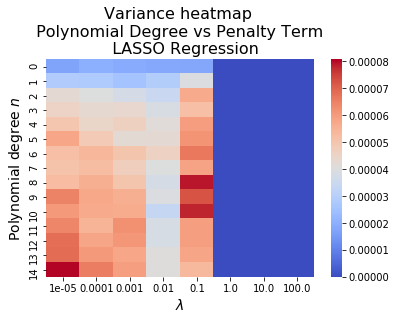

In [95]:
ax = sns.heatmap(variance.T, xticklabels=lamb, cmap="coolwarm")
ax.set_title('Variance heatmap \n Polynomial Degree vs Penalty Term \n  LASSO Regression',fontsize = 16)
ax.set_ylabel('Polynomial degree $n$',fontsize = 14)
ax.set_xlabel('$\lambda$',fontsize = 14)

Text(0.5, 15.0, '$\\lambda$')

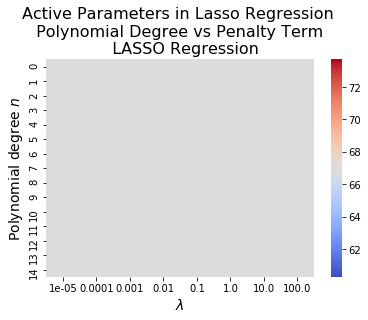

In [96]:
ax = sns.heatmap(activlasso.T, xticklabels=lamb, cmap="coolwarm")
ax.set_title('Active Parameters in Lasso Regression \n Polynomial Degree vs Penalty Term \n  LASSO Regression',fontsize = 16)
ax.set_ylabel('Polynomial degree $n$',fontsize = 14)
ax.set_xlabel('$\lambda$',fontsize = 14)

# Terrain Data

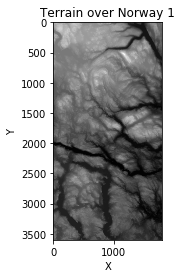

In [117]:
import numpy as np
from imageio import imread
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
# Load the terrain
terrain1 = imread("SRTM_data_Norway.tif")
# Show the terrain
plt.figure()
plt.title("Terrain over Norway 1")
plt.imshow(terrain1, cmap="gray")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

## Creating a Subset of the Data

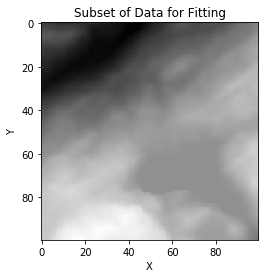

In [118]:
# Initializing the data
x_start, x_end = 800, 900
y_start, y_end = 500,600
Z =  np.array(terrain1[y_start:y_end,x_start:x_end])


plt.title("Subset of Data for Fitting")
plt.imshow(Z, cmap="gray")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()



## Reducing the resolution of the data down to N x N datapoints.


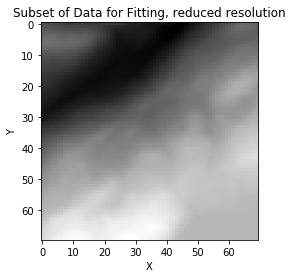

In [119]:
N = 70
x, y = np.linspace(0,1,N), np.linspace(0,1,N)
Z = fn.terrain_sampling(x,y,Z)

x, y = np.meshgrid(x,y)
plt.imshow(Z, cmap="gray")
plt.title("Subset of Data for Fitting, reduced resolution")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


# Normalizing the data points

In [120]:
Z = (Z-np.mean(Z))/np.sqrt(np.var(Z))

# Plotting the terrain

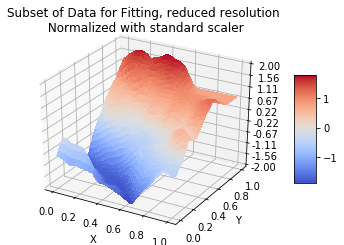

In [121]:
fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(x, y, Z, cmap=cm.coolwarm,
                        linewidth=0, antialiased=False)


# Customize the z axis.
ax.set_zlim((-2, 2))
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.set_title("Subset of Data for Fitting, reduced resolution\n Normalized with standard scaler")
ax.set_xlabel("X")
ax.set_ylabel("Y")
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

# OLS

The MSE for the prediciton is:
0.007509004789251774 

The R2 for the prediciton is:
0.9922955452761872 



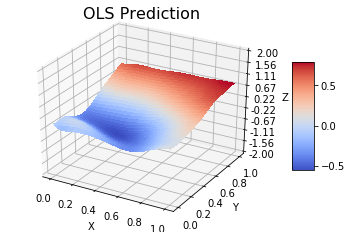

In [122]:
# Initializing the data
N = 70
test_size = 0.2
n =  10

# Creating design matrix, splitting and scaling
X_train, X_test, z_train, z_test = fn.PreProcess(x, y, Z, test_size, n)

# Inverting XTX matrix with SVD to avoid singular matrix
XTXinv = fn.SVDinv(X_train.T.dot(X_train))

# Estimating the Ordinary Least Squares Beta Matrix
OLSbeta = XTXinv.dot(X_train.T).dot(z_train)

# Making the prediciton
z_tilde = X_train @ OLSbeta
z_predict = X_test @ OLSbeta

#Computing variance
betavar_OLS = np.sqrt(np.diag(XTXinv)*np.var(z_train))


# Printing Scores
print("The MSE for the prediciton is:")
print(fn.MSE(z_test, z_predict), "\n")

print("The R2 for the prediciton is:")
print(fn.R2(z_test, z_predict), "\n")

fn.surfplotter(x,y,OLSbeta, n, 'OLS Prediction', (-2, 2))

# RIDGE

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in sqrt


The MSE for the prediciton is:
0.0175844251643231 

The R2 for the prediciton is:
0.9826368956252765 



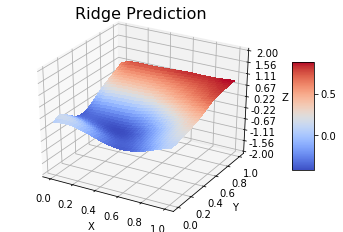

In [123]:
# Initializing the data
N = 70
test_size = 0.2
n =  10
lamb = 1e-4

# Creating design matrix, splitting and scaling
X_train, X_test, z_train, z_test = fn.PreProcess(x, y, Z, test_size, n)


# Estimating the Ridge Beta Matrix
# Inverting XTX matrix with SVD to avoid singular matrix
RIDGEbeta = fn.SVDinv((X_train.T.dot(X_train)+lamb*np.eye(X_train[0].shape[0]))).dot(X_train.T).dot(z_train)

# Making the prediciton
z_tilde = X_train @ RIDGEbeta
z_predict = X_test @ RIDGEbeta

# Computing variance
betavar_RIDGE = np.diag(np.sqrt(np.var(z_train)*(XTXinv) @ X_train.T.dot(X_train) @ (XTXinv.T)))

# Printing Scores
print("The MSE for the prediciton is:")
print(fn.MSE(z_test, z_predict), "\n")

print("The R2 for the prediciton is:")
print(fn.R2(z_test, z_predict), "\n")

fn.surfplotter(x,y,RIDGEbeta,n, 'Ridge Prediction',(-2, 2))


# LASSO

The MSE for the prediciton is:
0.04129724441463168 

The R2 for the prediciton is:
0.9595899384863352 



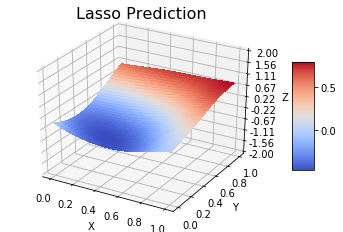

In [124]:
# Initializing the data
N = 70
test_size = 0.2
n =  10
lamb = 1e-4

# Creating design matrix, splitting and scaling
X_train, X_test, z_train, z_test = fn.PreProcess(x, y, Z, test_size, n)

# Estimating the lasso coefficients
clf = linear_model.Lasso(alpha=lamb, fit_intercept=False)
clf.fit(X_train, z_train)
LASSObeta = clf.coef_


# Making the prediciton
z_tilde = X_train @ LASSObeta
z_predict = X_test @ LASSObeta


# Printing Scores
print("The MSE for the prediciton is:")
print(fn.MSE(z_test, z_predict), "\n")

print("The R2 for the prediciton is:")
print(fn.R2(z_test, z_predict), "\n")

fn.surfplotter(x,y,LASSObeta,n, 'Lasso Prediction',(-2, 2))


# COMPARING OLS AND RIDGE CONFIDENCE INTERVALS FOR TERRAIN DATA

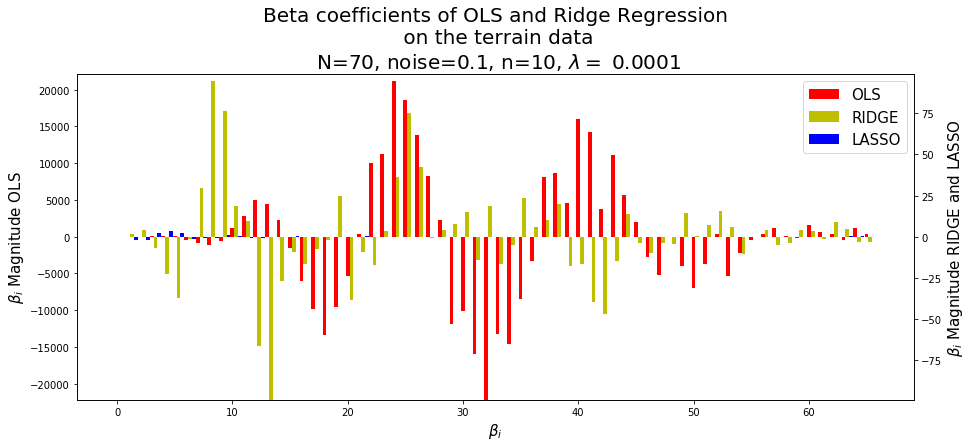

In [125]:
# Plotting the figure


#labels= ['1','$x$','$y$','$x^2$','$xy$','$y^2$','$x^3$','$x^2y$','$xy^2$','$y^3$','$x^4$',
#         '$x^3y$','$x^2y^2$','$xy^3$','$y^4$','$x^5$','$x^4y$','$x^3y^2$','$x^2y^3$','$xy^4$','$y^5$']

ind = np.arange(len(RIDGEbeta))
width = 0.33

fig, ax = plt.subplots(figsize=(15,6))

rects1 = ax.bar(ind, OLSbeta, width, color = 'r')#,yerr=2*betavar_OLS, capsize=3)
ax2 = ax.twinx()
rects2 = ax2.bar(ind+width, RIDGEbeta, width, color = 'y')#, yerr=2*betavar_RIDGE, capsize=5)

rects3 = ax2.bar(ind+2*width, LASSObeta, width, color = 'b')

ax.set_ylim(-1.05*np.max(OLSbeta),1.05*np.max(OLSbeta))
ax2.set_ylim(-1.05*np.max(RIDGEbeta),1.05*np.max(RIDGEbeta))

ax.set_ylabel(r'$\beta_i$ Magnitude OLS', fontsize=15)
ax2.set_ylabel(r'$\beta_i$ Magnitude RIDGE and LASSO', fontsize=15)


ax.set_xlabel(r"$\beta_i$", fontsize = 15)
#ax.set_xticks(ind+width/2)
#ax.set_xticklabels(labels, fontsize=15)
ax.set_title('Beta coefficients of OLS and Ridge Regression\n on the terrain data\n N={}, noise={}, n={}, $\lambda =$ {}'.format(N, noisefactor,n,lamb), fontsize=20)
ax.legend((rects1[0],rects2[0], rects3[0]), ('OLS', 'RIDGE', 'LASSO'), fontsize=15)
plt.show()

#fig.savefig('Results/betaconfidenceRIDGE.png')



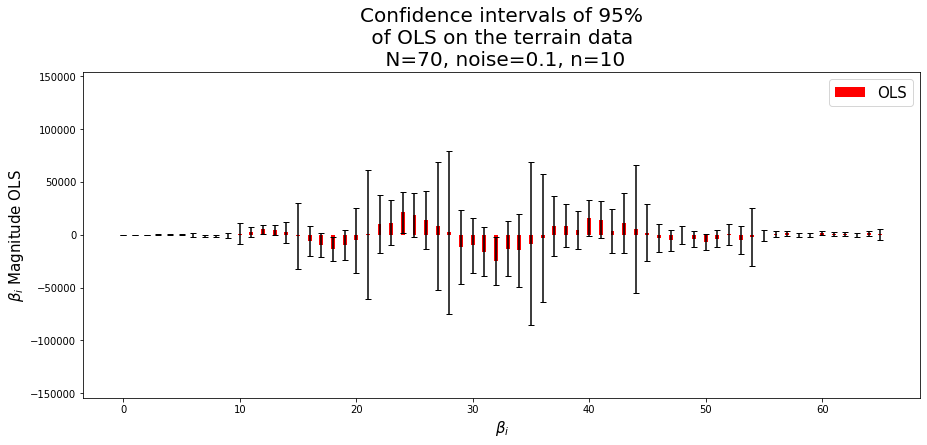

In [126]:
# Plotting the figure
ind = np.arange(len(OLSbeta))

fig, ax = plt.subplots(figsize=(15,6))

rects = ax.bar(ind, OLSbeta, width, color = 'r',yerr=2*betavar_OLS, capsize=3, label='OLS')

ax.set_ylim(-4*np.max(betavar_OLS),4*np.max(betavar_OLS))

ax.set_ylabel(r'$\beta_i$ Magnitude OLS', fontsize=15)

ax.set_xlabel(r"$\beta_i$", fontsize = 15)
#ax.set_xticks(ind+width/2)
#ax.set_xticklabels(labels, fontsize=15)
ax.set_title('Confidence intervals of 95%\n of OLS on the terrain data \n N={}, noise={}, n={}'.format(N, noisefactor,n,lamb), fontsize=20)
ax.legend(fontsize=15)
plt.show()

#fig.savefig('Results/betaconfidenceRIDGE.png')



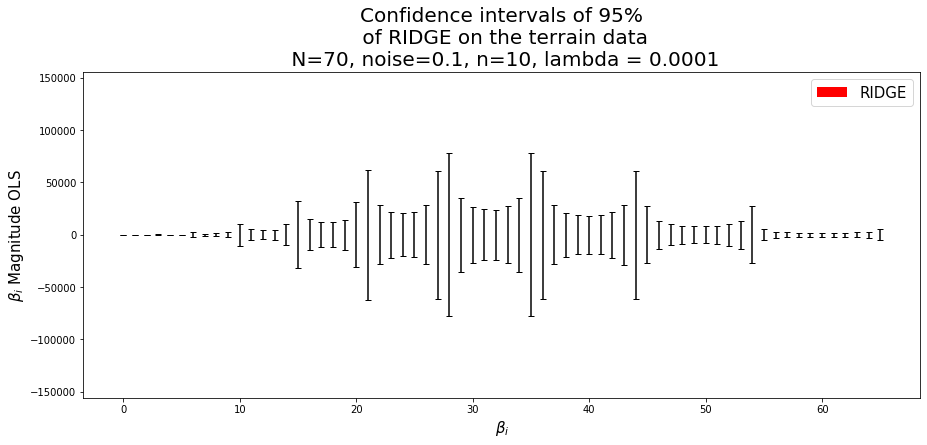

In [127]:
# Plotting the figure
ind = np.arange(len(RIDGEbeta))

fig, ax = plt.subplots(figsize=(15,6))

rects = ax.bar(ind, RIDGEbeta, width, color = 'r',yerr=2*betavar_RIDGE, capsize=3, label='RIDGE')

ax.set_ylim(-4*np.max(betavar_RIDGE),4*np.max(betavar_RIDGE))

ax.set_ylabel(r'$\beta_i$ Magnitude OLS', fontsize=15)

ax.set_xlabel(r"$\beta_i$", fontsize = 15)
#ax.set_xticks(ind+width/2)
#ax.set_xticklabels(labels, fontsize=15)
ax.set_title('Confidence intervals of 95%\n of RIDGE on the terrain data\n N={}, noise={}, n={}, lambda = {}'.format(N, noisefactor,n,lamb), fontsize=20)
ax.legend(fontsize=15)
plt.show()

#fig.savefig('Results/betaconfidenceRIDGE.png')






# OLS Bootstrapping Train Test Error

In [132]:
# Data Parameters
N = 30
test_size = 0.2
n = 15



# Intializing error bias and variance
error = np.zeros(n)
bias = np.zeros(n)
variance = np.zeros(n)

# Bootstrap parameters
n_bootstraps = 100

for i in range(n):
    # Creating design matrix, splitting and scaling
    X_train, X_test, z_train, z_test = fn.PreProcess(x, y, Z, test_size, i)

    # Setting up the array for the bootstrapped predictions
    z_pred = np.empty((z_test.shape[0], n_bootstraps))
    
    for j in range(n_bootstraps):
        x_, z_  = fn.Shuffle_Data(X_train, z_train)
        OLSbeta = fn.SVDinv(x_.T.dot(x_)).dot(x_.T).dot(z_) 
        z_pred[:,j] = X_test @ OLSbeta 

    #Reshaping
    z_test = z_test.reshape(len(z_test),1)
    
    error[i], bias[i], variance[i] = fn.ErrBiasVar(z_test, z_pred)

C:\Users\Jesterbtw\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


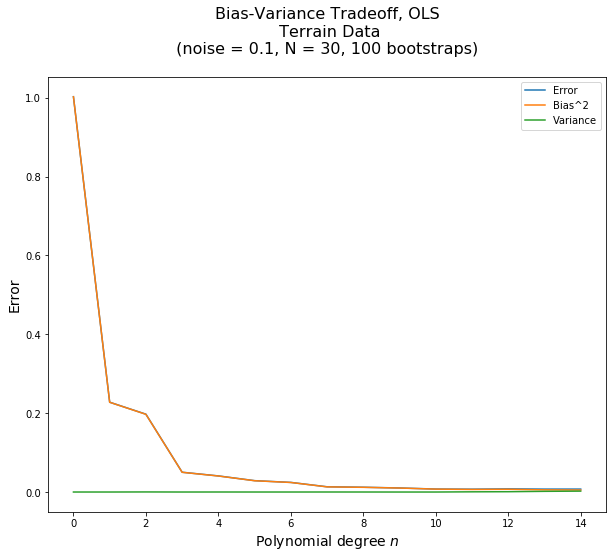

In [133]:
startpoint = 0
endpoint = 15

fig, ax = plt.subplots(figsize=(10,8))

ax.plot(np.arange(n)[startpoint:endpoint], error[startpoint:endpoint], label='Error')
ax.plot(np.arange(n)[startpoint:endpoint], bias[startpoint:endpoint], label='Bias^2')
ax.plot(np.arange(n)[startpoint:endpoint], variance[startpoint:endpoint], label='Variance')



ax.set_ylabel("Error", fontsize=14)
ax.set_xlabel("Polynomial degree $n$",  fontsize=14)
ax.set_title("Bias-Variance Tradeoff, OLS\n Terrain Data\n (noise = {0}, N = {1}, {2} bootstraps) \n".format(noisefactor, N, n_bootstraps), fontsize =16)


#ax.set_yscale("log")
ax.legend()
#plt.savefig("Results/BootstrapOLSBiasVariance.png", dpi=100)
fig.show()


# RIDGE BOOTSTRAPPING

In [161]:
# Initializing the data
N = 70
test_size = 0.2
n =  15

# Lambda
lamb = np.logspace(-5,2,8)

# Bootstrap parameters
n_bootstraps = 50

# Intializing error bias and variance
error = np.zeros((len(lamb),n))
bias = np.zeros((len(lamb),n))
variance = np.zeros((len(lamb),n))
activridge = np.zeros((len(lamb),n))

for k in range(len(lamb)):
    print("Lamdba equals {}".format(lamb[k]))
    for i in range(n):
            
        # Creating design matrix, splitting and scaling
        X_train, X_test, z_train, z_test = fn.PreProcess(x, y, Z, test_size, i)

        # Setting up the array for the bootstrapped predictions
        z_pred = np.empty((z_test.shape[0], n_bootstraps))

        for j in range(n_bootstraps):
            x_, z_  = fn.Shuffle_Data(X_train, z_train)
            RIDGEbeta = fn.SVDinv(x_.T.dot(x_)+lamb[k]*np.eye(len(X_train[0])) ).dot(x_.T).dot(z_) 
            z_pred[:,j] = X_test @ RIDGEbeta 

        #Reshaping
        z_test = z_test.reshape(len(z_test),1)


        error[k,i], bias[k,i], variance[k,i] = fn.ErrBiasVar(z_test, z_pred)
        activridge[k,i] = np.sum(abs(RIDGEbeta)>0.000001)/(len(RIDGEbeta)+0.01)

Lamdba equals 1e-05
Lamdba equals 0.0001
Lamdba equals 0.001
Lamdba equals 0.01
Lamdba equals 0.1
Lamdba equals 1.0
Lamdba equals 10.0
Lamdba equals 100.0


Text(0.5, 15.0, '$\\lambda$')

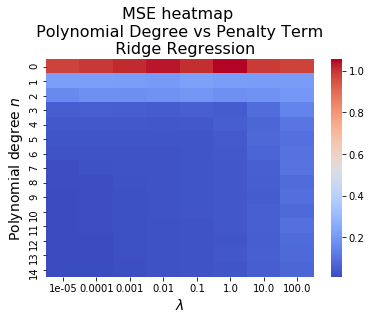

In [162]:
import seaborn as sns
ax = sns.heatmap(error.T, xticklabels=lamb, cmap="coolwarm")
ax.set_title('MSE heatmap \n Polynomial Degree vs Penalty Term \n  Ridge Regression',fontsize = 16)
ax.set_ylabel('Polynomial degree $n$',fontsize = 14)
ax.set_xlabel('$\lambda$',fontsize = 14)

Text(0.5, 15.0, '$\\lambda$')

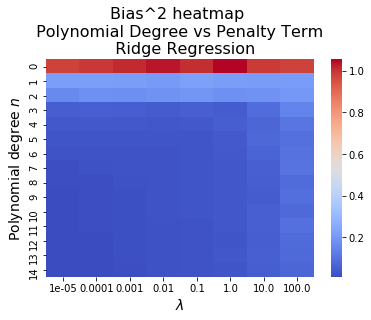

In [163]:
ax = sns.heatmap(bias.T, xticklabels=lamb, cmap="coolwarm")
ax.set_title('Bias^2 heatmap \n Polynomial Degree vs Penalty Term \n  Ridge Regression',fontsize = 16)
ax.set_ylabel('Polynomial degree $n$',fontsize = 14)
ax.set_xlabel('$\lambda$',fontsize = 14)

Text(0.5, 15.0, '$\\lambda$')

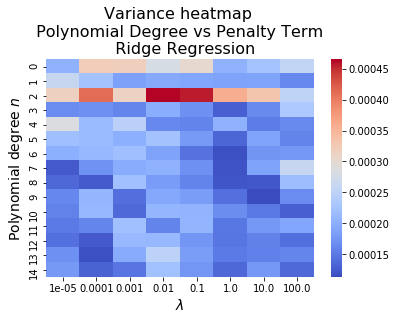

In [164]:
ax = sns.heatmap(variance.T, xticklabels=lamb, cmap="coolwarm")
ax.set_title('Variance heatmap \n Polynomial Degree vs Penalty Term \n  Ridge Regression',fontsize = 16)
ax.set_ylabel('Polynomial degree $n$',fontsize = 14)
ax.set_xlabel('$\lambda$',fontsize = 14)

<bound method Artist.set of <matplotlib.axes._subplots.AxesSubplot object at 0x000001790F4E4BE0>>

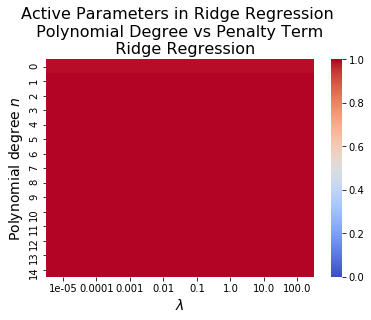

In [173]:
ax = sns.heatmap(activridge.T, xticklabels=lamb, cmap="coolwarm",vmin=0, vmax=1)
ax.set_title('Active Parameters in Ridge Regression \n Polynomial Degree vs Penalty Term \n  Ridge Regression',fontsize = 16)
ax.set_ylabel('Polynomial degree $n$',fontsize = 14)
ax.set_xlabel('$\lambda$',fontsize = 14)
ax.set

# LASSO BOOTSTRAPPING

In [167]:
from sklearn import linear_model

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=ConvergenceWarning)


#@ignore_warnings(category=ConvergenceWarning)
# Removed warning so better display the notebook

# Initializing the data
N = 70
test_size = 0.2
n =  15

# Lambda
lamb = np.logspace(-5,2,8)

# Bootstrap parameters
n_bootstraps = 50

# Intializing error bias and variance
error = np.zeros((len(lamb),n))
bias = np.zeros((len(lamb),n))
variance = np.zeros((len(lamb),n))


activlasso = np.zeros((len(lamb),n))
for k in range(len(lamb)):
    print("Lamdba equals {}".format(lamb[k]))

    for i in range(n):
        print("n equals {}".format(i))
        # Creating design matrix, splitting and scaling
        X_train, X_test, z_train, z_test = fn.PreProcess(x, y, Z, test_size, i)

        # Setting up the array for the bootstrapped predictions
        z_pred = np.empty((z_test.shape[0], n_bootstraps))

        for j in range(n_bootstraps):
            x_, z_  = fn.Shuffle_Data(X_train, z_train)

            # Lasso regression
            clf = linear_model.Lasso(alpha=lamb[k], fit_intercept=False)
            clf.fit(x_, z_)
            LASSObeta = clf.coef_
            z_pred[:,j] = X_test @ LASSObeta 
            
            
        
        
        #Reshaping
        z_test = z_test.reshape(len(z_test),1)


        error[k,i], bias[k,i], variance[k,i] = fn.ErrBiasVar(z_test, z_pred)
        activlasso[k,i] = np.sum(abs(LASSObeta)>0.000001)/(len(LASSObeta)+0.01)

Lamdba equals 1e-05
n equals 0
n equals 1
n equals 2
n equals 3
n equals 4
n equals 5
n equals 6
n equals 7
n equals 8
n equals 9
n equals 10
n equals 11
n equals 12
n equals 13
n equals 14
Lamdba equals 0.0001
n equals 0
n equals 1
n equals 2
n equals 3
n equals 4
n equals 5
n equals 6
n equals 7
n equals 8
n equals 9
n equals 10
n equals 11
n equals 12
n equals 13
n equals 14
Lamdba equals 0.001
n equals 0
n equals 1
n equals 2
n equals 3
n equals 4
n equals 5
n equals 6
n equals 7
n equals 8
n equals 9
n equals 10
n equals 11
n equals 12
n equals 13
n equals 14
Lamdba equals 0.01
n equals 0
n equals 1
n equals 2
n equals 3
n equals 4
n equals 5
n equals 6
n equals 7
n equals 8
n equals 9
n equals 10
n equals 11
n equals 12
n equals 13
n equals 14
Lamdba equals 0.1
n equals 0
n equals 1
n equals 2
n equals 3
n equals 4
n equals 5
n equals 6
n equals 7
n equals 8
n equals 9
n equals 10
n equals 11
n equals 12
n equals 13
n equals 14
Lamdba equals 1.0
n equals 0
n equals 1
n equals 2
n

Text(0.5, 15.0, '$\\lambda$')

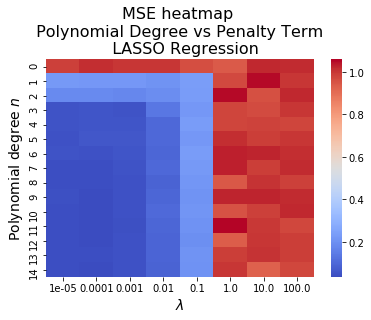

In [168]:
import seaborn as sns
ax = sns.heatmap(error.T, xticklabels=lamb, cmap="coolwarm")
ax.set_title('MSE heatmap \n Polynomial Degree vs Penalty Term \n  LASSO Regression',fontsize = 16)
ax.set_ylabel('Polynomial degree $n$',fontsize = 14)
ax.set_xlabel('$\lambda$',fontsize = 14)

Text(0.5, 15.0, '$\\lambda$')

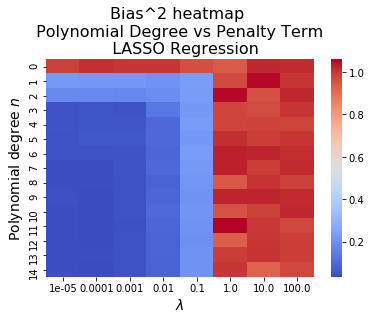

In [169]:
ax = sns.heatmap(bias.T, xticklabels=lamb, cmap="coolwarm")
ax.set_title('Bias^2 heatmap \n Polynomial Degree vs Penalty Term \n  LASSO Regression',fontsize = 16)
ax.set_ylabel('Polynomial degree $n$',fontsize = 14)
ax.set_xlabel('$\lambda$',fontsize = 14)

Text(0.5, 15.0, '$\\lambda$')

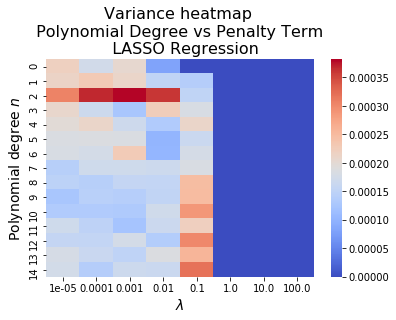

In [170]:
ax = sns.heatmap(variance.T, xticklabels=lamb, cmap="coolwarm")
ax.set_title('Variance heatmap \n Polynomial Degree vs Penalty Term \n  LASSO Regression',fontsize = 16)
ax.set_ylabel('Polynomial degree $n$',fontsize = 14)
ax.set_xlabel('$\lambda$',fontsize = 14)

Text(0.5, 15.0, '$\\lambda$')

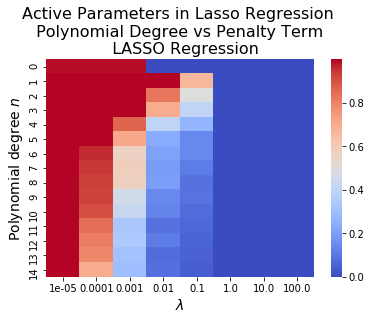

In [171]:
ax = sns.heatmap(activlasso.T, xticklabels=lamb, cmap="coolwarm")
ax.set_title('Active Parameters in Lasso Regression \n Polynomial Degree vs Penalty Term \n  LASSO Regression',fontsize = 16)
ax.set_ylabel('Polynomial degree $n$',fontsize = 14)
ax.set_xlabel('$\lambda$',fontsize = 14)